In [6]:
import pandas as pd
import matplotlib.pyplot as plt
netflix = pd.read_csv(r'data\netflix_titles.csv')

In [4]:
# 폰트확인
# import matplotlib.font_manager as fm
# [f.name for f in fm.fontManager.ttflist if 'Gothic' in f.name]

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [196]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
netflix[['director','cast','country']]=netflix[['director','cast','country']].fillna('Unknown',axis=0)

In [8]:
netflix=netflix.dropna(axis=0)

In [9]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])

In [5]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [202]:
# country 별  rating,duration 비율 type 종류비율 
# add된 날짜별 

# 다른 국가에서 사용할 수 있는 콘텐츠 이해
# 텍스트 기반의 특징을 일치시켜 유사한 콘텐츠 식별
# 배우/감독의 네트워크 분석 및 흥미로운 인사이트 찾기
# Netflix는 최근 몇 년 동안 영화보다 TV 쇼에 더 집중하고 있습니까?

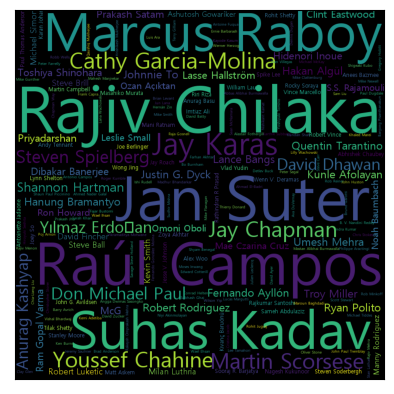

In [6]:
from wordcloud import WordCloud

from collections import Counter

net_directors = list(netflix[netflix['director'] != 'Unknown']['director'])
result = ', '.join(s for s in net_directors)
dir_list = result.split(sep=', ')
dir_list_c = Counter(dir_list)

wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(dir_list_c)
plt.xticks([])
plt.yticks([])
plt.imshow(gen)


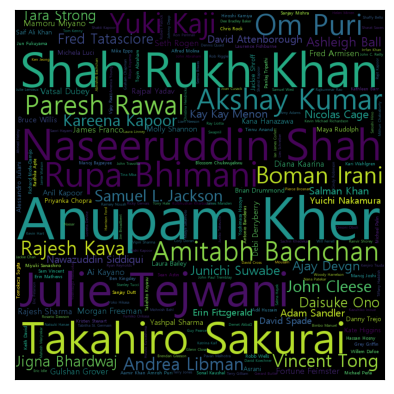

In [7]:
net_casts = list(netflix[netflix['cast'] != 'Unknown']['cast'])
result = ', '.join(s for s in net_casts)
cast_list = result.split(sep=', ')

cast_list_c = Counter(cast_list)

wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen_1 = wc.generate_from_frequencies(cast_list_c)
plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(gen_1)

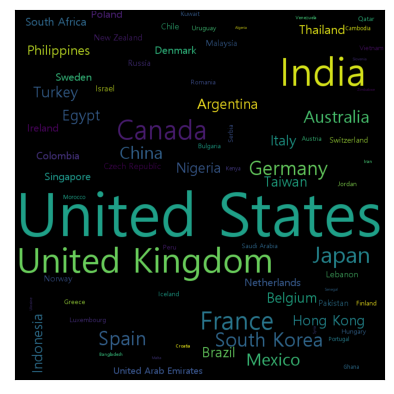

In [25]:
net_country = list(netflix[netflix['country'] != 'Unknown']['country'])
result = ', '.join(s for s in net_country)
country = result.split(sep=', ')

while True:
    dup_list = []
    for coun in country:
        if f'{coun},' in country:
            dup_list.append(coun)
    dup_list = list(set(dup_list))
    if dup_list != []:
        for dup in dup_list:
            country[country.index(f'{dup},')] = country[country.index(f'{dup},')].replace(f'{dup},',dup)
    else:
        break
for i in range(country.count('West Germany')):
    country[country.index('West Germany')] = country[country.index('West Germany')].replace('West Germany','Germany')
for i in range(country.count('East Germany')):
    country[country.index('East Germany')] = country[country.index('East Germany')].replace('East Germany','Germany')
for i in range(country.count('Soviet Union')):
    country[country.index('Soviet Union')] = country[country.index('Soviet Union')].replace('Soviet Union','Russia')
    
country_c = Counter(country)

wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen_2 = wc.generate_from_frequencies(country_c)
plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(gen_2)

<AxesSubplot: xlabel='release_year', ylabel='count'>

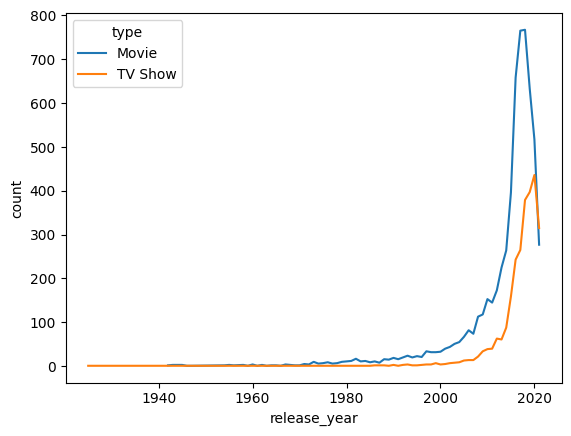

In [243]:
import seaborn as sns
#출시년도별 type
type_release_year = netflix.groupby(['type','release_year'],as_index=False).agg(count=('country','count'))
sns.lineplot(data = type_release_year,x='release_year',y='count',hue='type')


<AxesSubplot: xlabel='year_added', ylabel='count'>

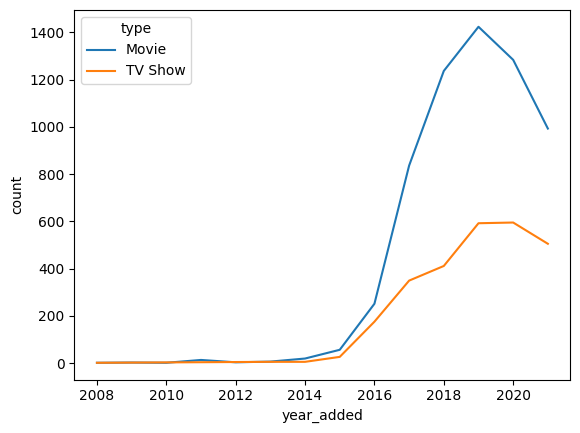

In [244]:
netflix['year_added'] = netflix['date_added'].dt.year
type_year_added = netflix.groupby(['type','year_added'],as_index=False).agg(count=('country','count'))
sns.lineplot(data = type_year_added,x='year_added',y='count',hue='type')

In [26]:
count_country = {}
for letter in country:
    if letter not in count_country:
        count_country[letter] = 0
    count_country[letter] += 1

In [27]:
country_df = pd.DataFrame({'country':list(count_country.keys()),'count':list(count_country.values())})
country_df = country_df[country_df['country'] != '']
country_df

,country,count
0,United States,3681
1,South Africa,62
2,India,1046
3,Ghana,5
4,Burkina Faso,1
...,...,...
115,Somalia,1
116,Sudan,1
117,Panama,1
118,Uganda,1


In [264]:
# import googlemaps

# my_key =
# maps = googlemaps.Client(key=my_key)  # my key값 입력
# lat = []  #위도
# lng = []  #경도

# places = list(country_df['country'])

# for place in places:   
#     i = i + 1
#     try:
#         geo_location = maps.geocode(place)[0].get('geometry')
#         lat.append(geo_location['location']['lat'])
#         lng.append(geo_location['location']['lng'])
        

#     except:
#         lat.append('')
#         lng.append('')

# df = pd.DataFrame({'country':places, 'lat':lat, 'lon':lng})
# df.to_csv('country_location.csv')


 API queries_quota: 60 



In [28]:
df = pd.read_csv('country_location.csv')
country_df = country_df.merge(df, on='country')
country_df.isnull().sum()

country       0
count         0
Unnamed: 0    0
lat           0
lon           0
dtype: int64

In [29]:
country_df = country_df.drop(labels='Unnamed: 0',axis=1).dropna(axis=0)
country_df.isnull().sum()

country    0
count      0
lat        0
lon        0
dtype: int64

In [30]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  119 non-null    object 
 1   count    119 non-null    int64  
 2   lat      119 non-null    float64
 3   lon      119 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.6+ KB


In [31]:
import folium
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

In [32]:
for i in range(0,len(country_df)):
   folium.Circle(
      location=[country_df.iloc[i]['lat'], country_df.iloc[i]['lon']],
      popup=country_df.iloc[i]['country'],
      radius=float(country_df.iloc[i]['count'])*200,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m

In [286]:
import folium
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

In [287]:
for i in range(0,len(country_df)):
   folium.Circle(
      location=[country_df.iloc[i]['lat'], country_df.iloc[i]['lon']],
      popup=country_df.iloc[i]['country'],
      radius=float(country_df.iloc[i]['count'])*1000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m.save('bubble-map-with-folium.html')